In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('./datasets/dogs.csv')

In [3]:
df

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [4]:
feature_names = df.columns[1:]

In [5]:
feature_names

Index(['height', 'weight'], dtype='object')

In [6]:
from sklearn.preprocessing import MinMaxScaler

In [7]:
scaler = MinMaxScaler()

In [8]:
X = df[feature_names]

In [9]:
X = scaler.fit_transform(X)

In [10]:
X = pd.DataFrame(X, columns=feature_names)

In [11]:
from sklearn.cluster import AgglomerativeClustering

In [12]:
model = AgglomerativeClustering(n_clusters=3, linkage='single', compute_distances=True)

In [13]:
model.fit(X)

AgglomerativeClustering(compute_distances=True, linkage='single', n_clusters=3)

In [14]:
model.labels_

array([0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2])

In [15]:
df[model.labels_ == 0]

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
5,German Shepherd,25,78
6,Golden Retriever,23,70
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [16]:
model.children_[:,0].shape

(10,)

In [17]:
model.distances_

array([0.05047034, 0.07720025, 0.09301156, 0.10094068, 0.1246148 ,
       0.1246148 , 0.15167269, 0.28508383, 0.31753116, 0.32454896])

In [18]:
model.distances_.reshape(-1,1).shape

(10, 1)

In [19]:
n_samples = len(model.labels_)
counts = np.zeros(model.children_.shape[0])

for i, (left, right) in enumerate(model.children_):
    count_left = 1 if left < n_samples else counts[left - n_samples]
    count_right = 1 if right < n_samples else counts[right - n_samples]
    counts[i] = count_left + count_right

counts = counts.reshape(-1, 1)
counts = counts.flatten()

In [20]:
z = np.vstack((model.children_[:,0], model.children_[:,1], model.distances_, counts))
z = np.transpose(z)
z

array([[ 0.        ,  8.        ,  0.05047034,  2.        ],
       [ 4.        , 10.        ,  0.07720025,  2.        ],
       [ 6.        ,  5.        ,  0.09301156,  2.        ],
       [11.        ,  2.        ,  0.10094068,  3.        ],
       [14.        ,  9.        ,  0.1246148 ,  4.        ],
       [15.        ,  1.        ,  0.1246148 ,  5.        ],
       [16.        , 13.        ,  0.15167269,  7.        ],
       [17.        ,  3.        ,  0.28508383,  8.        ],
       [18.        , 12.        ,  0.31753116, 10.        ],
       [19.        ,  7.        ,  0.32454896, 11.        ]])

In [21]:
z = z[:, :-1]
z

array([[ 0.        ,  8.        ,  0.05047034],
       [ 4.        , 10.        ,  0.07720025],
       [ 6.        ,  5.        ,  0.09301156],
       [11.        ,  2.        ,  0.10094068],
       [14.        ,  9.        ,  0.1246148 ],
       [15.        ,  1.        ,  0.1246148 ],
       [16.        , 13.        ,  0.15167269],
       [17.        ,  3.        ,  0.28508383],
       [18.        , 12.        ,  0.31753116],
       [19.        ,  7.        ,  0.32454896]])

In [22]:
from sklearn.metrics import silhouette_score

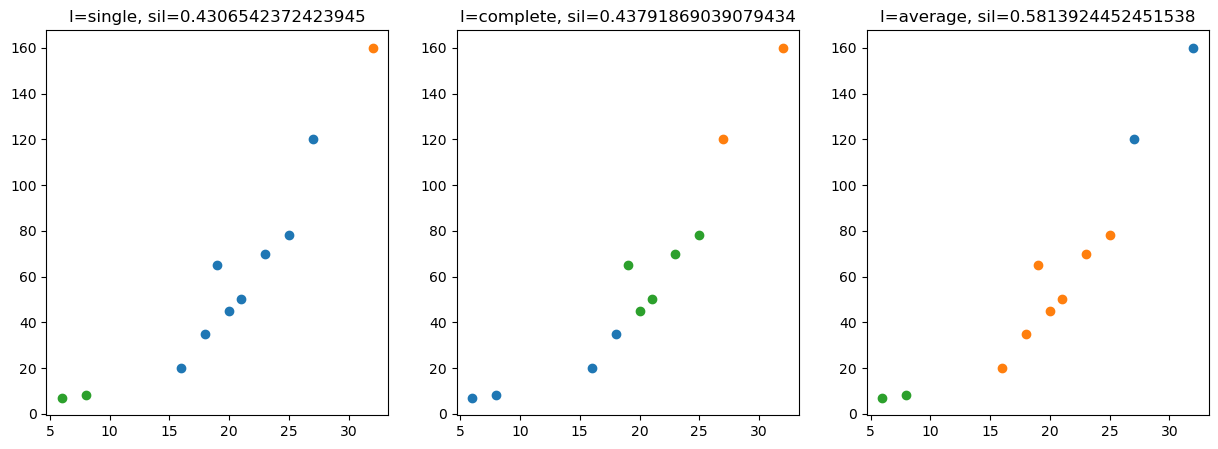

In [23]:
k = 3
linkages = ['single', 'complete', 'average']
fig = plt.figure(figsize=(15,5))

for idx, linkage in enumerate(linkages):
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    model.fit(X)

    fig.add_subplot(1, len(linkages), idx+1)

    for cluster_label in range(k):
        cluster = df[model.labels_ == cluster_label]
        plt.scatter(cluster['height'], cluster['weight'])
    plt.title(f'l={linkage}, sil={silhouette_score(X, model.labels_)}')

plt.show()

In [24]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
Z = linkage(X, method='average')
Z

array([[ 0.        ,  8.        ,  0.05047034,  2.        ],
       [ 4.        , 10.        ,  0.07720025,  2.        ],
       [ 5.        ,  6.        ,  0.09301156,  2.        ],
       [ 1.        ,  2.        ,  0.1246148 ,  2.        ],
       [ 9.        , 11.        ,  0.1304373 ,  3.        ],
       [14.        , 15.        ,  0.21119649,  5.        ],
       [13.        , 16.        ,  0.29077603,  7.        ],
       [ 3.        ,  7.        ,  0.32454896,  2.        ],
       [12.        , 17.        ,  0.59213162,  9.        ],
       [18.        , 19.        ,  0.80001992, 11.        ]])

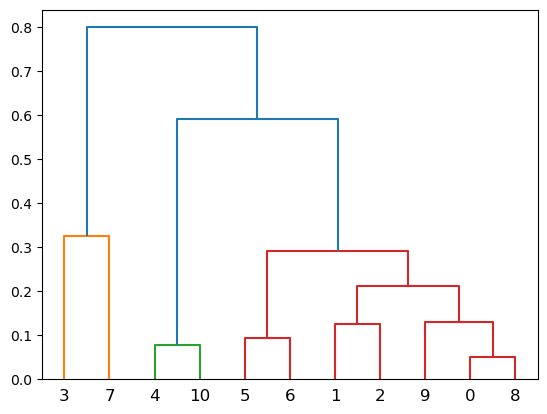

In [26]:
_ = dendrogram(Z, labels=df.index)

In [27]:
X = X.set_index(df['breed'])

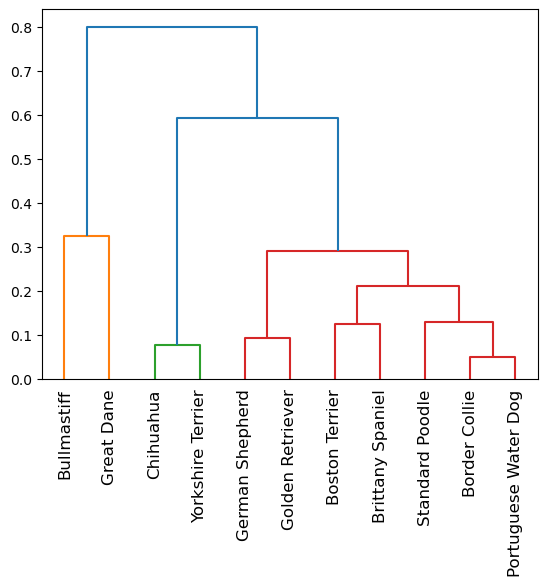

In [28]:
_ = dendrogram(Z, labels=X.index, leaf_rotation=90)

In [29]:
from sklearn.cluster import DBSCAN

In [30]:
model = DBSCAN(eps=0.1, min_samples=2)

In [31]:
model.fit(X)

DBSCAN(eps=0.1, min_samples=2)

In [32]:
model.labels_

array([ 0, -1, -1, -1,  1,  2,  2, -1,  0, -1,  1])

In [33]:
np.unique(model.labels_)

array([-1,  0,  1,  2])

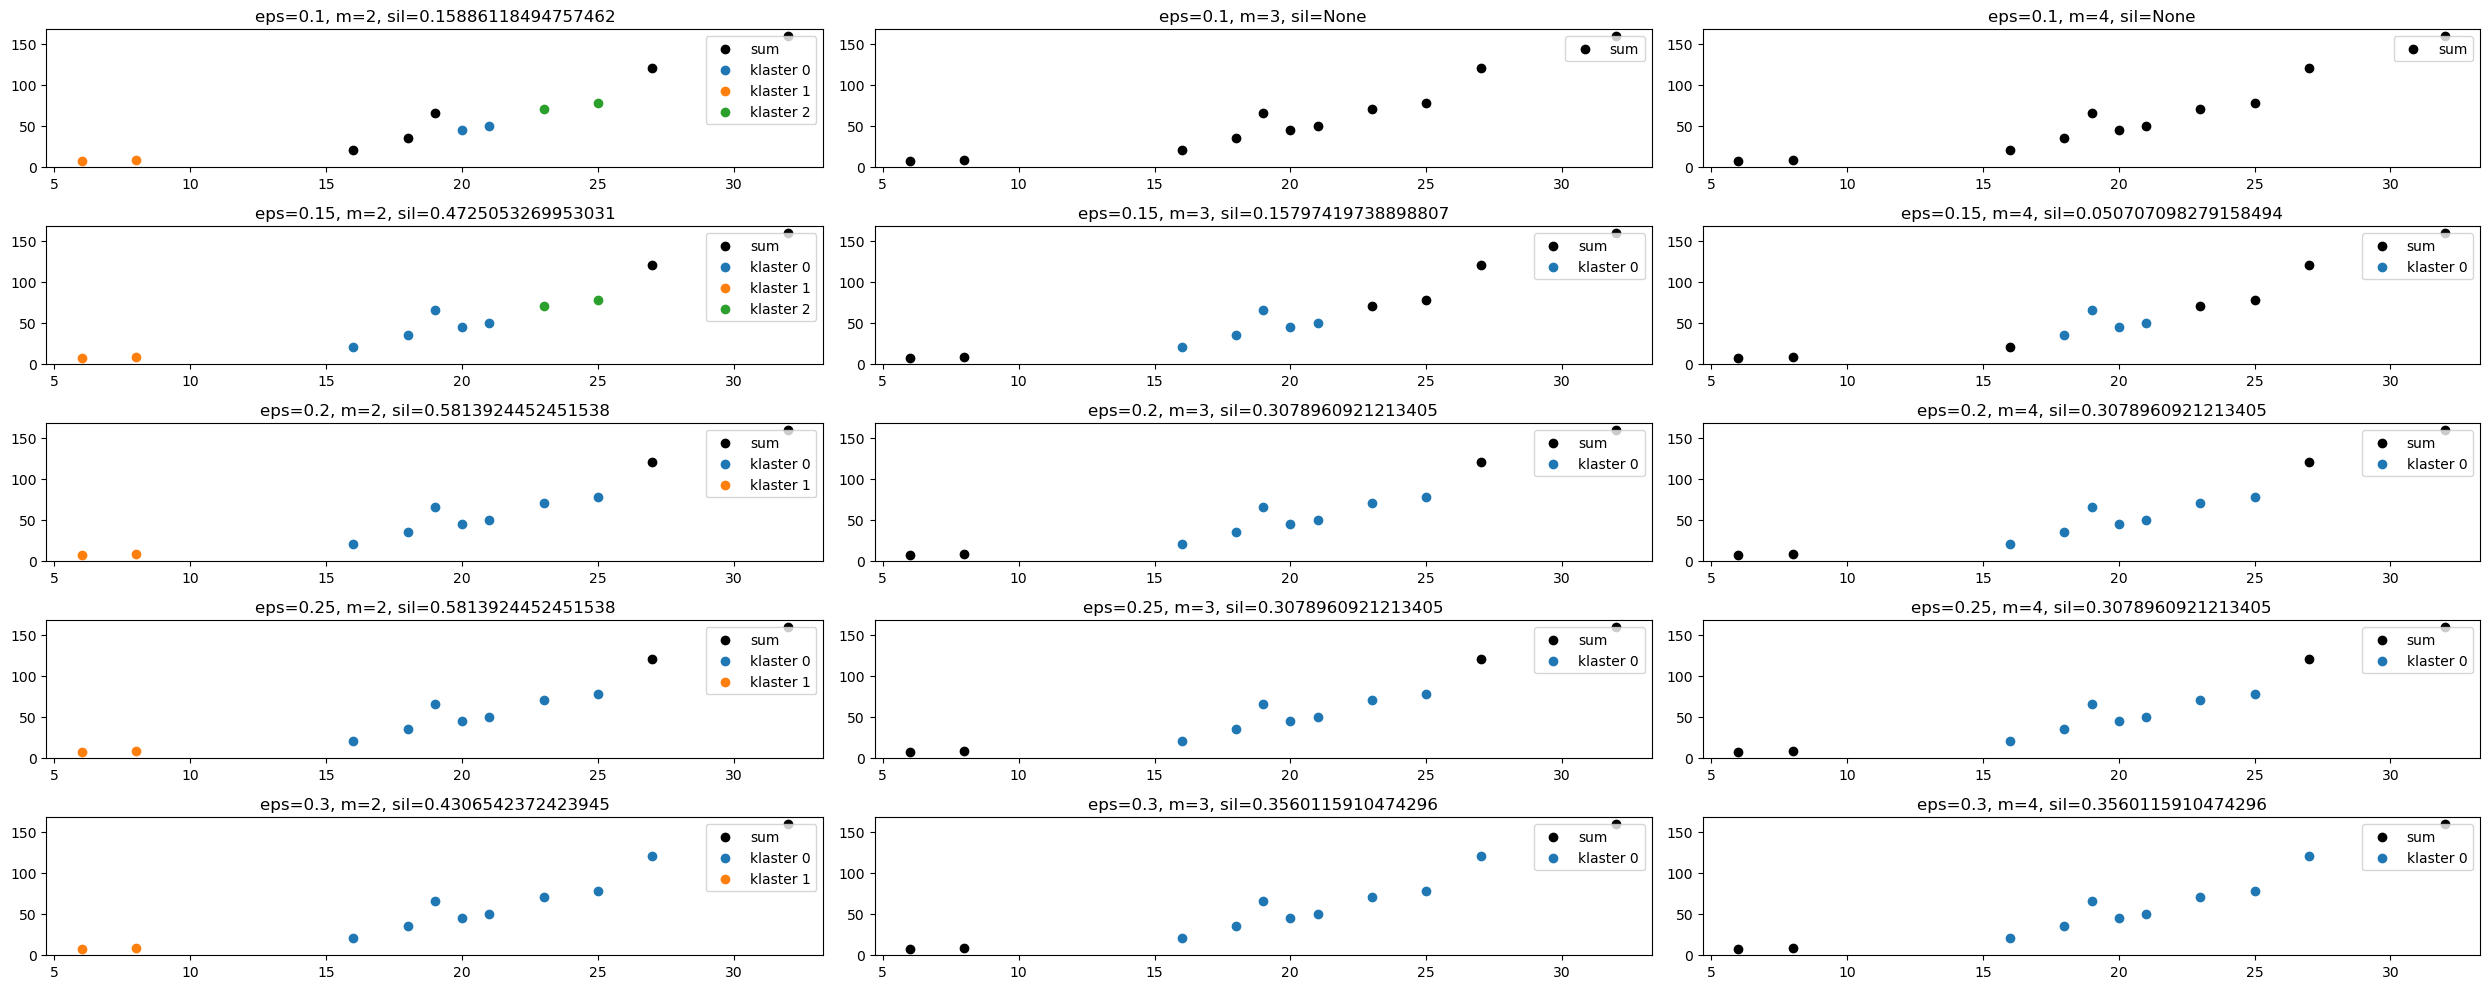

In [38]:
min_samples = 2
eps_values = [0.1, 0.15, 0.2, 0.25, 0.3]
min_samples_values = range(2,5)
fig = plt.figure(figsize=(25,10))
idx = 1

for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)

        fig.add_subplot(len(eps_values), len(min_samples_values), idx)
        idx += 1 

        for cluster_label in np.unique(model.labels_):
            cluster = df[model.labels_ == cluster_label]
            if cluster_label == -1:
                plt.scatter(cluster['height'], cluster['weight'], color='black', label='sum')
            else:
                plt.scatter(cluster['height'], cluster['weight'], label=f'klaster {cluster_label}')

        plt.legend()
        if len(np.unique(model.labels_)) == 1:
            s = None
        else:
            s = silhouette_score(X, model.labels_)
        plt.title(f'eps={eps}, m={min_samples}, sil={s}')

plt.tight_layout()